In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Specify the data types for the columns
dtypes = {
    'INC NUMBER': 'str',
    'OCCURRED ON': 'str',
    'OCCURRED TO': 'str',
    'UCR CRIME CATEGORY': 'str',
    '100 BLOCK ADDR': 'str',
    'ZIP': 'float',
    'PREMISE TYPE': 'str',
    'GRID': 'str'
}

# Read the CSV file with specified data types
crime_data = pd.read_csv('./Resources/Crime-data.csv', dtype=dtypes)

# Drop rows with missing 'ZIP' values
crime_data = crime_data.dropna(subset=['ZIP'])

# Remove decimal points from the 'ZIP' column
crime_data['ZIP'] = crime_data['ZIP'].astype(int)

# Clean up time info
#crime_data = crime_data.dropna(subset=['OCCURRED TO'])
# crime_data['OCCURRED_TO_datetime'] = pd.to_datetime(crime_data['OCCURRED TO'], errors='coerce')
# crime_data['OCCURRED_TO_MMDDYY'] = crime_data['OCCURRED_TO_datetime'].dt.strftime('%m/%d/%y')
# crime_data['OCCURRED_ON'] = pd.to_datetime(crime_data['OCCURRED ON'], format='%m/%d/%Y %H:%M', errors='coerce')
# crime_data['OCCURRED_ON_datetime'] = crime_data['OCCURRED_ON'].dt.strftime('%m/%d/%y %H:%M')
# crime_data['OCCURRED_ON_MMDDYY'] = crime_data['OCCURRED_ON'].dt.strftime('%m/%d/%y')
# crime_data = crime_data.drop(columns=['OCCURRED ON', 'OCCURRED TO', 'OCCURRED_ON'])

# Display the dataframe
# crime_data.head(10)

In [19]:
#check premise types and counts
premise_type_counts = crime_data['PREMISE TYPE'].value_counts()
print(premise_type_counts)

# Calculate percentages
premise_type_percentages = premise_type_counts / premise_type_counts.sum() * 100

# Identify categories below 5%
categories_below_5 = premise_type_percentages[premise_type_percentages < 5].index

#Group categories below 5% into "Other"
premise_type_counts_grouped = premise_type_counts.copy()
premise_type_counts_grouped['OTHER(BELOW 5%)'] = premise_type_counts_grouped[categories_below_5].sum()
premise_type_counts_grouped = premise_type_counts_grouped.drop(categories_below_5)
premise_type_counts_grouped = premise_type_counts_grouped.drop(labels=['OTHER(BELOW 5%)'])
crime_data_filtered = crime_data[crime_data['PREMISE TYPE'].isin(premise_type_counts_grouped.index)]
num_categories = len(premise_type_counts_grouped)

# # Create the pie chart using only the top categories and 'Other'
# plt.figure(figsize=(10, 10))
# plt.pie(premise_type_counts_grouped.values, labels=premise_type_counts_grouped.index, autopct='%1.1f%%', startangle=90)
# plt.title('Distribution of Premise Types (Top Categories Above 5%)')
# plt.savefig('./Resources/Distribution_of_Premise_Types.png', bbox_inches='tight')
# plt.show()



PREMISE TYPE
SINGLE FAMILY HOUSE            81608
APARTMENT                      78114
PARKING LOT                    47034
STREET / ROADWAY / SIDEWALK    36032
DEPARTMENT / DISCOUNT STORE    29177
                               ...  
REST AREA                         16
STOREROOM / SHED                  14
LAKE / WATERWAY / BEACH            9
TRIBAL LANDS                       7
MILITARY INSTALLATION              6
Name: count, Length: 98, dtype: int64


In [20]:
# Correlation analysis between premise type vs. crimes
# Possible occurrence of crime vs. premise type
premise_crime_summary = crime_data_filtered.groupby('PREMISE TYPE')['UCR CRIME CATEGORY'].value_counts().unstack(fill_value=0)
premise_crime_summary


UCR CRIME CATEGORY,AGGRAVATED ASSAULT,ARSON,BURGLARY,DRUG OFFENSE,LARCENY-THEFT,MOTOR VEHICLE THEFT,MURDER AND NON-NEGLIGENT MANSLAUGHTER,RAPE,ROBBERY
PREMISE TYPE,,,,,,,,,
APARTMENT,13543,310,13524,2678,28214,15977,263,2304,1301
DEPARTMENT / DISCOUNT STORE,456,22,917,392,25697,527,1,3,1162
PARKING LOT,1448,237,161,7579,25493,8274,214,216,3412
SINGLE FAMILY HOUSE,10316,552,29802,2415,27474,7394,264,2611,780
STREET / ROADWAY / SIDEWALK,7311,119,18,7012,11189,7835,204,157,2187


In [21]:
# # Get the top crime category for each premise type
# top_crime_category = premise_crime_summary.idxmax(axis=1)

# # Calculate the percentage of the top crime category for each premise type
# top_crime_percentage = premise_crime_summary.max(axis=1) / premise_crime_summary.sum(axis=1) * 100

# # Create a DataFrame to store the results
# top_crime_df = pd.DataFrame({
#     'Premise Type': top_crime_category.index,
#     'Top Crime Category': top_crime_category.values,
#     'Percentage': top_crime_percentage.values
# })
# top_crime_df['Combined Label'] = top_crime_df['Premise Type'] + ' - ' + top_crime_df['Top Crime Category']
# plt.figure(figsize=(10, 10))
# plt.pie(top_crime_percentage.values, labels=top_crime_df['Combined Label'].values, autopct='%1.1f%%', startangle=90)
# plt.title('Distribution of Top Crime Categories by Premise Type')
# plt.show()
# #plt.savefig('./Resources/Distribution_of_Top_Crime_Categories.png')
# top_crime_df


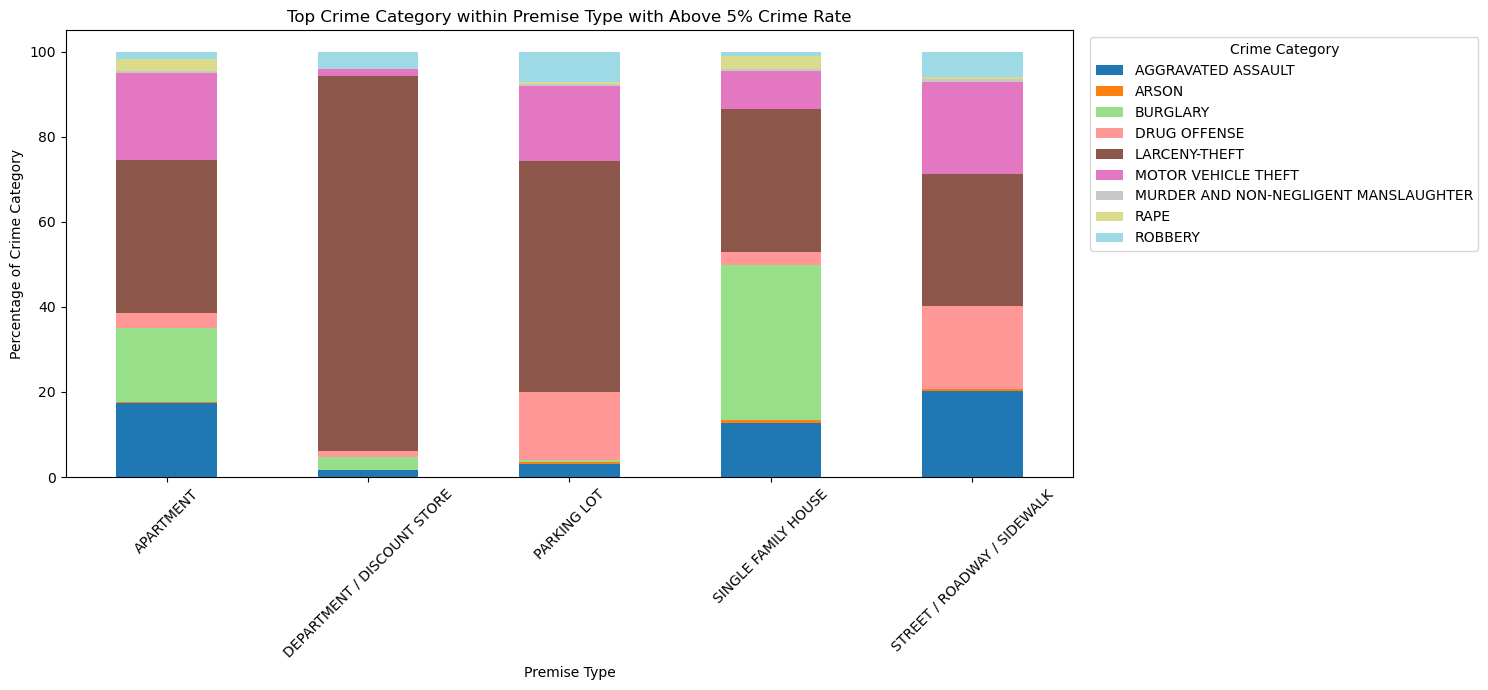

In [22]:
# Calculate total crime counts for each premise type
total_crime_per_premise = premise_crime_summary.sum(axis=1)

# Calculate percentages for each crime category
for col in premise_crime_summary.columns:
    premise_crime_summary[col] = (premise_crime_summary[col] / total_crime_per_premise) * 100

# Plot the stacked bar chart using the filtered data
premise_crime_summary.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.xlabel('Premise Type')
plt.ylabel('Percentage of Crime Category')
plt.title('Top Crime Category within Premise Type with Above 5% Crime Rate')
plt.xticks(rotation=45)
plt.legend(title='Crime Category', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.savefig('./Resources/Crime_category_percentage_by_top_premise_types.png')
plt.show()

In [23]:
# Time trend analysis
crime_data['OCCURRED TO']=pd.to_datetime(crime_data['OCCURRED TO'])
crime_data['OCCURRED TO']=crime_data['OCCURRED TO'].dt.strftime('%H:%m')
crime_data = crime_data.dropna(subset=['OCCURRED TO'])
crime_data

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
0,201700001603695,11/01/2015 00:00,00:03,RAPE,38XX W CAMELBACK RD,85019,HOSPITAL,BI20
2,201500002168686,11/01/2015 00:00,09:11,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT,BI30
3,201600000527709,11/01/2015 00:00,00:03,LARCENY-THEFT,33XX W CAMELBACK RD,85017,PARKING LOT,BJ21
4,201600000052855,11/01/2015 00:00,00:01,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE,DA19
5,201500002103724,11/01/2015 00:00,15:11,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031,APARTMENT,BH16
...,...,...,...,...,...,...,...,...
575760,202500000080607,01/16/2025 22:30,22:01,MOTOR VEHICLE THEFT,N 40TH AVE & W HACKAMORE DR,85083,SINGLE FAMILY HOUSE,EH19
575762,202500000082103,01/16/2025 23:00,09:01,BURGLARY,66XX W INDIAN SCHOOL RD,85033,FAST FOOD STORE,BG13
575763,202500000081831,01/16/2025 23:00,06:01,MOTOR VEHICLE THEFT,21XX E GRENADINE RD,85040,STREET / ROADWAY / SIDEWALK,AD32
575764,202500000080716,01/16/2025 23:01,23:01,LARCENY-THEFT,120XX N 32ND ST,85028,CONVENIENCE MARKET / STORE,DA34


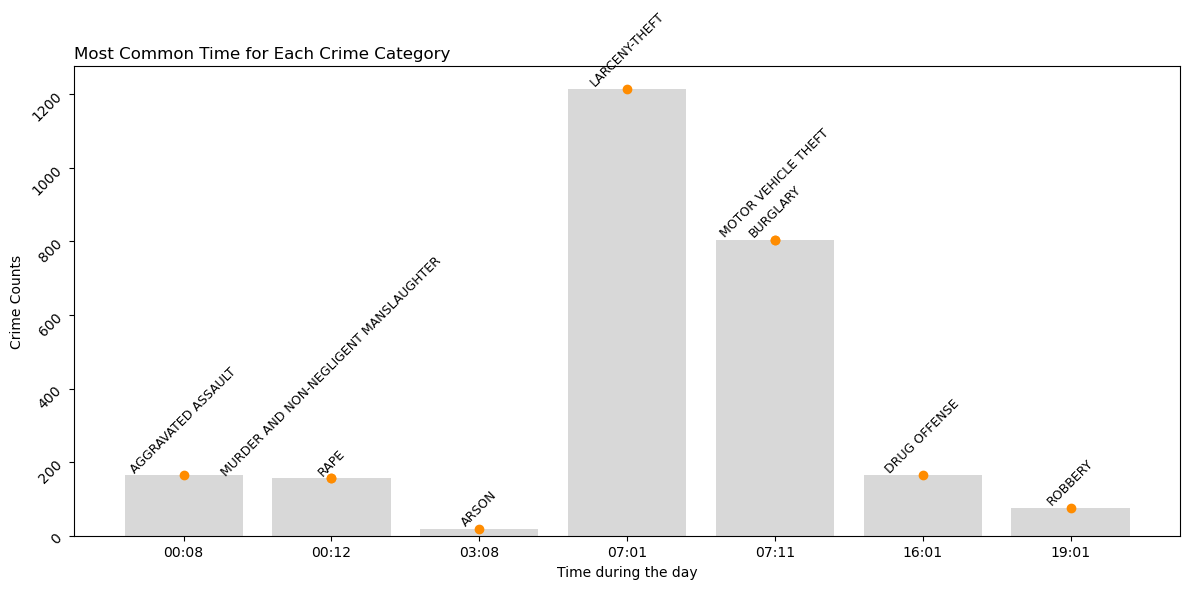

The most common time for crimes to occur is 07:01 with 1215 total occurrences.


In [24]:
crime_time=crime_data.groupby(['UCR CRIME CATEGORY','OCCURRED TO']).size().reset_index(name='Count')
#Most common time for each type of crime
most_commmon_times = crime_time.loc[crime_time.groupby('UCR CRIME CATEGORY')['Count'].idxmax()]
most_commmon_times = most_commmon_times.reset_index(drop=True)

# Convert 'OCCURRED TO' from string to datetime format
most_commmon_times['OCCURRED TO'] = pd.to_datetime(most_commmon_times['OCCURRED TO'], format='%H:%M')
most_commmon_times['Time'] = most_commmon_times['OCCURRED TO'].dt.strftime('%H:%M')


# Calculate total counts for each time
time_counts = most_commmon_times.groupby('Time')['Count'].sum()

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for counts
bars = plt.bar(time_counts.index, time_counts.values, alpha=0.3, color='gray', label='Crime Counts')

# Scatter points on top of the bars for most common times
for i, row in most_commmon_times.iterrows():
    plt.scatter(row['Time'], time_counts[row['Time']], color='darkorange', zorder=5)
    plt.text(row['Time'], time_counts[row['Time']] + 0.5, row['UCR CRIME CATEGORY'], fontsize=9, ha='center', va='bottom', rotation=45)

# Labels & Formatting
time_labels = sorted(time_counts.index)
plt.xticks(ticks=range(len(time_counts.index)), labels=time_counts.index)
plt.yticks(rotation=45, ha='right')
plt.xlabel('Time during the day')
plt.ylabel('Crime Counts')
plt.title('Most Common Time for Each Crime Category', loc='left')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.savefig('./Resources/Crime_type_during_during_the_data.png')  
plt.show()

# Print the most common time again if needed
most_common_time = time_counts.idxmax()  # Time with the max
most_common_time_count = time_counts.max()  # Sum of counts for that time
print(f"The most common time for crimes to occur is {most_common_time} with {most_common_time_count} total occurrences.")

In [8]:
#
zip_crime_counts = crime_data['ZIP'].value_counts().head(10)

# Create a new dataframe with the top 10 ZIP codes with the most crimes
top_10_zip_crimes = pd.DataFrame({'ZIP': zip_crime_counts.index, 'Crime Count': zip_crime_counts.values})

# Display the new dataframe
top_10_zip_crimes

,ZIP,Crime Count
0,85015,28953
1,85008,27435
2,85051,25837
3,85009,25491
4,85041,24215
5,85017,22772
6,85035,21890
7,85043,20911
8,85021,19836
9,85029,18196


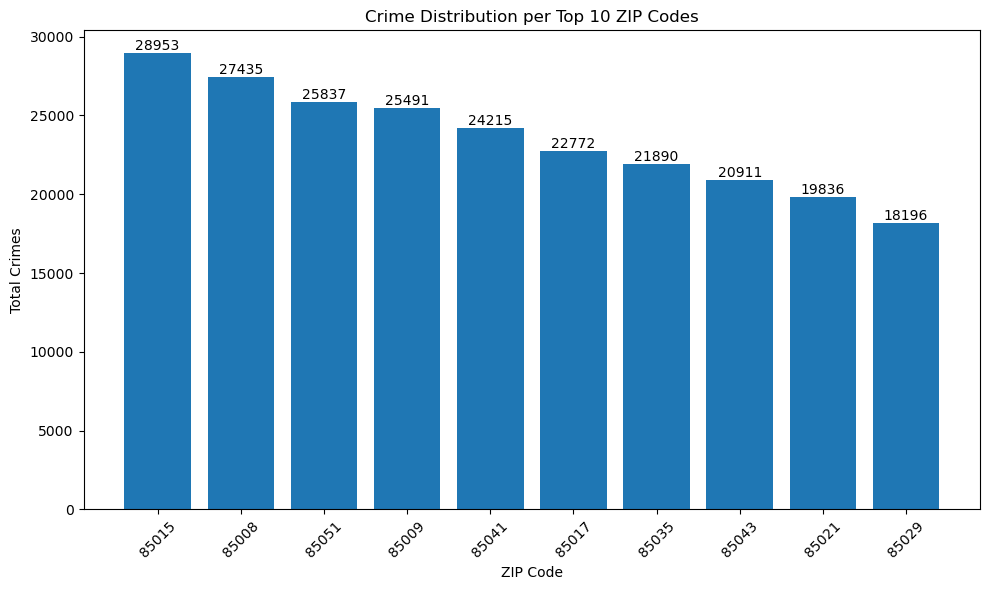

In [9]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_zip_crimes['ZIP'].astype(str), top_10_zip_crimes['Crime Count'])

# Add the total at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  

# Update layout
plt.title('Crime Distribution per Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Save the figure
save_path = './Resources/crime_distribution_per_top10.png'
plt.savefig(save_path)

# Show the plot
plt.show()


In [15]:

import plotly.express as px

# Filter the data to include only the top 10 ZIP codes
top_10_zips = top_10_zip_crimes['ZIP'].tolist()
filtered_crime_data = crime_data[crime_data['ZIP'].isin(top_10_zips)]

# Group the data by ZIP and UCR CRIME CATEGORY and count the occurrences
crime_counts_by_zip = filtered_crime_data.groupby(['ZIP', 'UCR CRIME CATEGORY']).size().reset_index(name='Crime Count')

# Create a line chart using Plotly
fig = px.line(crime_counts_by_zip, x='UCR CRIME CATEGORY', y='Crime Count', color='ZIP', title='Types of Crimes per Top 10 ZIP Codes')
fig.update_layout(xaxis_title='Crime Category', yaxis_title='Number of Crimes')
fig.update_traces(mode='lines+markers')

# Save the figure

%pip install kaleido
save_path = './Resources/crime_types_per_top10.png'
fig.write_image(save_path, engine='kaleido')

# Show the plot
fig.show()

Note: you may need to restart the kernel to use updated packages.
